# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing

from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load DataFrame
df = pd.read_csv('/Users/kiranrangaraj/Desktop/Final-Project/Data/Original/vehicles.csv')
df = pd.DataFrame(df)
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [3]:
#Re-index DataFrame so that the 'price' column is last
df = df.reindex(columns=['id', 'url', 'region', 'region_url', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long','price'])

In [4]:
df.shape

(458213, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            458213 non-null  int64  
 1   url           458213 non-null  object 
 2   region        458213 non-null  object 
 3   region_url    458213 non-null  object 
 4   year          457163 non-null  float64
 5   manufacturer  439993 non-null  object 
 6   model         453367 non-null  object 
 7   condition     265273 non-null  object 
 8   cylinders     287073 non-null  object 
 9   fuel          454976 non-null  object 
 10  odometer      402910 non-null  float64
 11  title_status  455636 non-null  object 
 12  transmission  455771 non-null  object 
 13  vin           0 non-null       float64
 14  drive         324025 non-null  object 
 15  size          136865 non-null  object 
 16  type          345475 non-null  object 
 17  paint_color   317370 non-null  object 
 18  imag

# Data Cleaning

## 1. Remove Irrelevant Data Aspects

In [6]:
df2 = df.copy()
df2 = df2.drop(columns=['url','region_url','vin','image_url','description','county','state'])
df2.head()

,id,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,7240372487,auburn,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,NaN,other,NaN,32.590000,-85.480000,35990
1,7240309422,auburn,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,NaN,sedan,NaN,32.547500,-85.468200,7500
2,7240224296,auburn,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,SUV,blue,32.616807,-85.464149,4900
3,7240103965,auburn,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,32.861600,-85.216100,2000
4,7239983776,auburn,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,32.547500,-85.468200,19500


## 2. Address Missing Values

In [7]:
#Return the column series with the respective of number of null values
df2.isnull().sum()

id                   0
region               0
year              1050
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer         55303
title_status      2577
transmission      2442
drive           134188
size            321348
type            112738
paint_color     140843
lat               7448
long              7448
price                0
dtype: int64

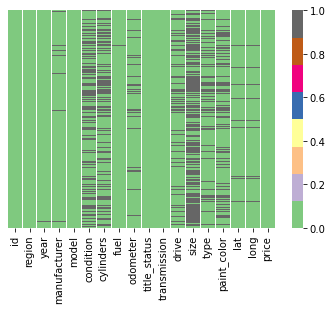

In [8]:
#Generate a heatmap to identify null values along a graph
sns.heatmap(df2.isnull(),yticklabels=False,cbar=True,cmap='Accent')
plt.savefig('original-null-values',dpi=None)

In [9]:
#Define numerical and categorical variables in order to address them separately
num_col=['year','odometer','lat','long']
cat_cols=['region','manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color']

## 2a. Iterative Imputation Method for Better Estimation

In [10]:
check_imputer=df2.copy()
check_imputer=check_imputer.drop(columns=['id'])

#Object of LabelEncoder
encoder=preprocessing.LabelEncoder()

#Function to label the categorical columns ignoring null values 
def encode(data):
    #Retains only non-null values
    nonulls = np.array(data.dropna())
    #Reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #Encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#Loop to replace each column/categorical value with a numberical value
for i in tqdm(range(len(cat_cols))):
    encode(check_imputer[cat_cols[i]])

100%|██████████| 12/12 [00:01<00:00, 10.97it/s]


In [11]:
check_imputer.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,16,2010.0,7,12317,2,6,2,32742.0,0,2,2,NaN,7,NaN,32.590000,-85.480000,35990
1,16,2014.0,18,27213,0,3,2,93600.0,0,0,1,NaN,9,NaN,32.547500,-85.468200,7500
2,16,2006.0,4,30748,2,5,2,87046.0,0,0,NaN,NaN,0,1,32.616807,-85.464149,4900
3,16,1974.0,7,10101,2,3,2,190000.0,0,0,2,1,8,1,32.861600,-85.216100,2000
4,16,2005.0,13,16813,0,6,0,116000.0,1,0,0,1,8,1,32.547500,-85.468200,19500


#### Metrics which measure the distance between the model and the data, such as 'mean_squared_error' , are returned as 'neg_mean_squared_error', which is the negated value of the metric.

In [12]:
#Estimate the score of the entire data set by filling in missing values based off of mean and median
br_estimator = BayesianRidge() #Base estimator
N_SPLITS = 6  #Defining the cross-validation splitting strategy

score_simple_imputer = pd.DataFrame() #data frame to store error of imputer
#Computing MSE for mean and median
for strategy in ('mean', 'median'):
    X=check_imputer.iloc[:,:-1]
    y = np.ravel(check_imputer.iloc[:,-1:])
    estimator = make_pipeline(
        SimpleImputer(missing_values=np.nan, strategy=strategy),
        br_estimator
    )
    score_simple_imputer[strategy] = cross_val_score(
        estimator, X, y, scoring='neg_mean_squared_error',
        cv=N_SPLITS
    )

In [13]:
#Fill in missing values using 4 different iterative imputations

#Estimators for IterativeImputer
estimators = [
    BayesianRidge(),
    DecisionTreeRegressor(max_features='sqrt', random_state=0),
    ExtraTreesRegressor(n_estimators=10, random_state=0),
    KNeighborsRegressor(n_neighbors=15)
]
score_iterative_imputer = pd.DataFrame()
for esti in estimators:
        print("Estimating",esti.__class__.__name__)
        imputer = IterativeImputer(esti)
        df_new=check_imputer.copy()
        for col in check_imputer.columns:
            impute_data=imputer.fit_transform(df_new[col].values.reshape(-1,1))
            impute_data=impute_data.astype('int64')
            impute_data = pd.DataFrame(np.ravel(impute_data))
            df_new[col]=impute_data
        X=df_new.iloc[:,:-1]
        y = np.ravel(df_new.iloc[:,-1:])
        score_iterative_imputer[esti.__class__.__name__] = cross_val_score(esti,X,y,scoring='neg_mean_squared_error',cv=6)

Estimating BayesianRidge
Estimating DecisionTreeRegressor
Estimating ExtraTreesRegressor
Estimating KNeighborsRegressor


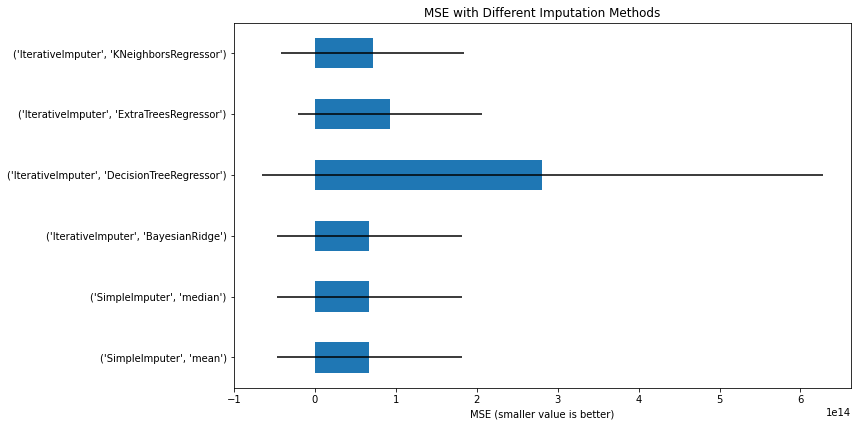

In [14]:
#Plot overall scores for each method
scores = pd.concat(
    [score_simple_imputer, score_iterative_imputer],
    keys=['SimpleImputer', 'IterativeImputer'], axis=1
)
fig, ax = plt.subplots(figsize=(12, 6))
means = -scores.mean()
errors = scores.std()
means.plot.barh(xerr=errors, ax=ax)
ax.set_title('MSE with Different Imputation Methods')
ax.set_xlabel('MSE (smaller value is better)')
ax.set_yticks(np.arange(means.shape[0]))
ax.set_yticklabels(means.index.tolist())
plt.tight_layout(pad=1)
plt.savefig('different-imputations-method',dpi=None)
plt.show()

## 2b. Fill Missing Numerical Values ('year' & 'odometer')

In [15]:
df2.isnull().sum()[num_col]

year         1050
odometer    55303
lat          7448
long         7448
dtype: int64

In [16]:
data_num=df2[num_col]
imputer_num=IterativeImputer(estimators[2])
impute_data=imputer_num.fit_transform(data_num)
df2[num_col]=impute_data

In [17]:
#Missing values after filling
df2.isnull().sum()[num_col]

year        0
odometer    0
lat         0
long        0
dtype: int64

## 2c. Fill Missing Categorical Values

In [18]:
#Missing values before filling
df2.isnull().sum()[cat_cols]

region               0
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
title_status      2577
transmission      2442
drive           134188
size            321348
type            112738
paint_color     140843
dtype: int64

In [19]:
data_cat=df2[cat_cols]
encoder=preprocessing.LabelEncoder()

#Create a for loop to iterate through each column in the data
for columns in cat_cols:
    encode(data_cat[columns])
    imputer = IterativeImputer(BayesianRidge())
    impute_data=imputer.fit_transform(data_cat[columns].values.reshape(-1, 1))
    impute_data=impute_data.astype('int64')
    impute_data = pd.DataFrame(impute_data)
    impute_data =encoder.inverse_transform(impute_data.values.reshape(-1, 1))
    data_cat[columns]=impute_data
df2[cat_cols]=data_cat    

In [20]:
#Missing values after filling
df2.isnull().sum()[cat_cols]

region          0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
dtype: int64

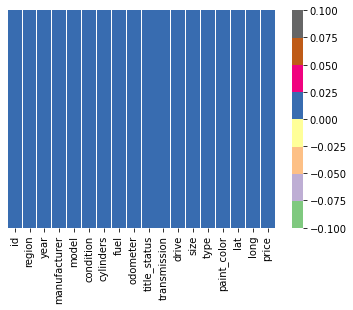

In [21]:
#Heat map to visually check null values
sns.heatmap(df2.isnull(),yticklabels=False,cbar=True,cmap='Accent')
plt.savefig('no-null-values',dpi=None)

In [22]:
#List method to show no null values in the dataset 
df2.isnull().sum()

id              0
region          0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
lat             0
long            0
price           0
dtype: int64

In [23]:
df2.to_csv('/Users/kiranrangaraj/Desktop/Final-Project/Data/CleanedUp/vehiclesData.csv',index=False)

In [24]:
df2=pd.read_csv('/Users/kiranrangaraj/Desktop/Final-Project/Data/CleanedUp/vehiclesData.csv')

## 3. Address Outliers

In [25]:
from IPython.display import display,Latex
outliers_condi=Latex(r" $\textbf{W𝑒 𝑐𝑎𝑛 𝑠𝑎𝑦 $𝑥_1$ or $x_2$ 𝑖𝑠 𝑜𝑢𝑡𝑙𝑖𝑒𝑟𝑠 if }\\ x_1 < Q1 - 1.5*IQR \\ or\\ x_2 > Q3+1.5*IQR $")
outliers_info=Latex(r"$L_{p} = \frac{p}{100}(n+1) = i_p.f_p \\ where \,\, i_p \,\, is \,\, integer \,\, part \,\, of \,\, L_p \,\, and \,\, f_p \,\, is \,\, fractional \,\, part \,\, of \,\, L_p \\ Q1 = Y_{25} = x_{i_p} + f_p*(x_{i_{p+1}}-x_{i_p}) \\ Q3 = Y_{75} = x_{i_p} + f_p*(x_{i_{p+1}}-x_{i_p}) \\ IQR = Q3-Q1 \\ x_1 = Q1 - 1.5*IQR \,\,and\,\, x_2 = Q3+1.5*IQR $")

In [26]:
display(outliers_info)
display(outliers_condi)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [27]:
#Return the range of variables and values outside of this range, ie. outliers
def outliers(arr,col):
    x=sorted(arr[col].values.ravel())
    L_25=25/100*(len(x)+1) #L_p where p=25%
    i_p=int(str(L_25).split(".")[0])
    f_p=int(str(L_25).split(".")[1])
    q1=x[i_p]+f_p*(x[i_p+1]-x[i_p])
    
    L_75=75/100*(len(x)+1) #L_p where p=75%
    i_p=int(str(L_75).split(".")[0])
    f_p=int(str(L_75).split(".")[1])
    q3=x[i_p]+f_p*(x[i_p+1]-x[i_p])
    
    #q1,q3=(arr[col].quantile([0.25,0.75]))
    
    IQR=q3-q1
    x1=q1-1.5*IQR
    x2=q3+1.5*IQR
    return (x1,x2)

## 3a. Price

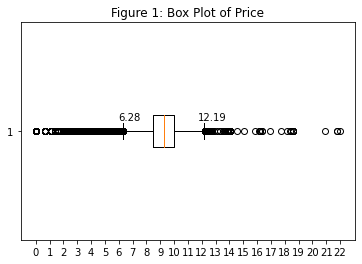

In [28]:
def min_max_price(df):
    r=[]
    q1,q3=(df['logprice'].quantile([0.25,0.75]))
    r.append(q1-1.5*(q3-q1))
    r.append(q3+1.5*(q3-q1))
    return (r)
df2['logprice'] = np.log(df2['price'])
x=df2['logprice']
price_range=list(range(0,int(max(df2['logprice']))+1))
red_square = dict(markerfacecolor='g', marker='s')
plt.boxplot(x, vert=False)
plt.xticks(price_range)
plt.text(min_max_price(df2)[0]-0.3,1.05,str(round(min_max_price(df2)[0],2)))
plt.text(min_max_price(df2)[1]-0.5,1.05,str(round(min_max_price(df2)[1],2)))
plt.title("Figure 1: Box Plot of Price")
plt.savefig('graph-boxplot-price.jpg')
plt.show()

## 3b. Odometer

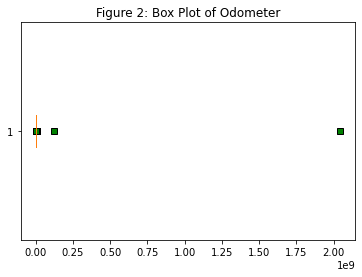

In [29]:
fig, ax1 = plt.subplots()
ax1.set_title('Figure 2: Box Plot of Odometer')
ax1.boxplot(df2['odometer'], vert=False, flierprops=red_square)
plt.savefig('graph-boxplot-odometer.jpg')
plt.show()

## 3c. Year

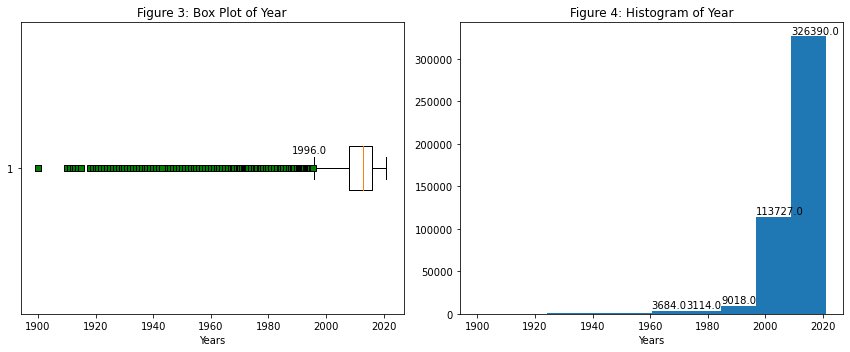

In [30]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

#Plot boxplot
o1,o2=outliers(df2,'year')
ax1.boxplot(sorted(df2['year']), vert=False, flierprops=red_square)
ax1.set_xlabel("Years")
ax1.set_title("Figure 3: Box Plot of Year")
ax1.text(o1-8,1.05,str(round(o1,2)))

#Plot histogram
hist,bins=np.histogram(df2['year'])
n, bins, patches = ax2.hist(x=df2['year'], bins=bins)
ax2.set_xlabel("Years")
ax2.set_title("Figure 4: Histogram of Year")
for i in range(len(n)):
    if(n[i]>2000):
        ax2.text(bins[i],n[i]+3000,str(n[i]))

plt.tight_layout()
plt.savefig('graph-boxplot-histogram-year.jpg',dpi=1200)
plt.show()

In [31]:
#Remove outliers 
df_new=df2.copy()
out=np.array(['logprice','odometer','year'])
for col in out:
    o1,o2=outliers(df_new,col)
    df_new=df_new[(df_new[col]>=o1) & (df_new[col]<=o2)]
    print('IQR of',col,'=',o1,o2)
df_new=df_new[df_new['price']!=0]
df_new.drop('logprice',axis=1,inplace=True)

IQR of logprice = 6.279112766851223 12.19345334617788
IQR of odometer = -96159.0 280265.0
IQR of year = 1993.5 2029.5


In [32]:
df_new.head()

,id,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,7240372487,auburn,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,full-size,other,grey,32.590000,-85.480000,35990
1,7240309422,auburn,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,full-size,sedan,grey,32.547500,-85.468200,7500
2,7240224296,auburn,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,4wd,full-size,SUV,blue,32.616807,-85.464149,4900
4,7239983776,auburn,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,32.547500,-85.468200,19500
5,7239776805,auburn,2016.0,toyota,tacoma double cab sr5,good,6 cylinders,gas,33290.0,clean,other,4wd,full-size,pickup,red,32.590000,-85.480000,29590


In [33]:
print("Shape before process=",df.shape)
print("Shape After process=",df_new.shape)
diff=df.shape[0]-df_new.shape[0]
print("Total {} rows and {} cols removed".format(diff,df.shape[1]-df_new.shape[1]))
df_new.to_csv('/Users/kiranrangaraj/Desktop/Final-Project/Data/CleanedUp/vehiclesFinal.csv',index=False)

Shape before process= (458213, 25)
Shape After process= (395982, 18)
Total 62231 rows and 7 cols removed
